In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [3]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,69.306335,54.709999,35.239986
2014-01-03,69.077980,54.560001,35.159195
2014-01-06,68.691544,57.200001,35.254677
2014-01-07,68.902321,57.919998,35.658634
2014-01-08,68.357780,58.230000,35.790836


In [4]:
pf_data.tail()

,WMT,FB,BP
Date,,,
2019-01-30,94.800003,150.419998,40.669998
2019-01-31,95.830002,166.690002,41.119999
2019-02-01,93.860001,165.710007,41.340000
2019-02-04,94.769997,169.250000,41.389999
2019-02-05,95.599998,171.160004,42.820000


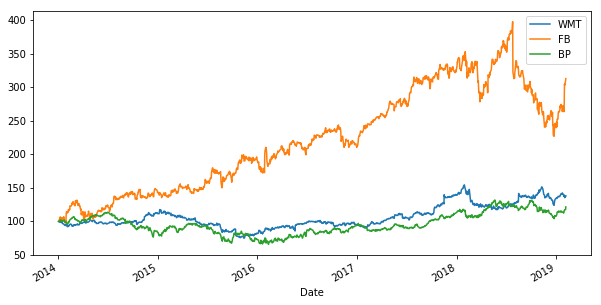

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

WMT    0.062771
FB     0.222590
BP     0.038022
dtype: float64

In [8]:
log_returns.cov() * 250

,WMT,FB,BP
WMT,0.037114,0.008769,0.007187
FB,0.008769,0.091893,0.017422
BP,0.007187,0.017422,0.055248


In [9]:
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.150148,0.158709
FB,0.150148,1.000000,0.244516
BP,0.158709,0.244516,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

3

In [12]:
arr = np.random.random(2)
arr

array([0.85686126, 0.48077375])

In [13]:
arr[0] + arr[1]

1.3376350123413654

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.16747177, 0.51861641, 0.31391182])

In [15]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.1378867474839851

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03915254707375331

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.19787002570817366

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.08316056936336283,
  0.11783079374213372,
  0.10006535010082321,
  0.12221525092228952,
  0.10569342100828617,
  0.10964520219471575,
  0.10289754619146017,
  0.07456004277183921,
  0.04803969240974284,
  0.12529237583043074,
  0.09912424733676407,
  0.17118543202079833,
  0.06000967623712197,
  0.1288366891650335,
  0.08023429003352822,
  0.09355623510689831,
  0.05195913472897572,
  0.0793207649527312,
  0.0815506790143631,
  0.12542321570979417,
  0.10509523090620566,
  0.08933226577431044,
  0.10087832493354346,
  0.051534466814845956,
  0.08016596057170002,
  0.08250121083337755,
  0.15730744481497755,
  0.0881016639941944,
  0.1087717911271548,
  0.12850462695735793,
  0.15590430568486027,
  0.0949267977686111,
  0.09486367079863085,
  0.09314394340991837,
  0.12762911994077417,
  0.1050370649103752,
  0.0642469432434638,
  0.12688200965326316,
  0.06048221560887683,
  0.09038164619983521,
  0.1096067486239861,
  0.10695220571180367,
  0.0875375507277972,
  0.1004519121597751

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.08681518, 0.05802178, 0.10355297, 0.12007102, 0.1347766 ,
        0.08316576, 0.09899425, 0.0594868 , 0.07198935, 0.14047176,
        0.11353029, 0.11126591, 0.08972527, 0.13304674, 0.09067996,
        0.10640757, 0.12456011, 0.08345051, 0.12938944, 0.11133885,
        0.10558472, 0.06741211, 0.08126495, 0.11896657, 0.09261824,
        0.14993945, 0.10382263, 0.12348088, 0.13932161, 0.05352724,
        0.13005309, 0.06709792, 0.10184835, 0.07548475, 0.07336209,
        0.06733616, 0.14871486, 0.11917123, 0.13137636, 0.11261385,
        0.0502515 , 0.11216587, 0.08902292, 0.0893691 , 0.05552795,
        0.14314161, 0.10771307, 0.14720206, 0.17678527, 0.12829186,
        0.13408235, 0.11479221, 0.1297266 , 0.04115206, 0.10631624,
        0.10859809, 0.1048954 , 0.05232622, 0.15338287, 0.07014081,
        0.10201271, 0.08614371, 0.11772132, 0.14536977, 0.10616791,
        0.10712522, 0.09352378, 0.10106308, 0.07426789, 0.11801217,
        0.12230874, 0.11007174, 0.14318182, 0.08

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.086815,0.155065
1,0.058022,0.157977
2,0.103553,0.175192
3,0.120071,0.199041
4,0.134777,0.185501


In [23]:
portfolios.tail()

,Return,Volatility
995,0.149479,0.209520
996,0.115983,0.175889
997,0.055970,0.160796
998,0.089491,0.174274
999,0.124023,0.176384


Text(0, 0.5, 'Expected Return')

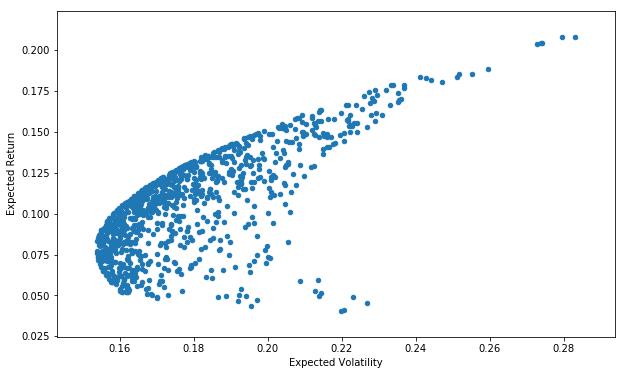

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')